In [2]:
import torch
import matplotlib.pyplot as plt

$p(x) = 1 - 2x^2 + x^4$

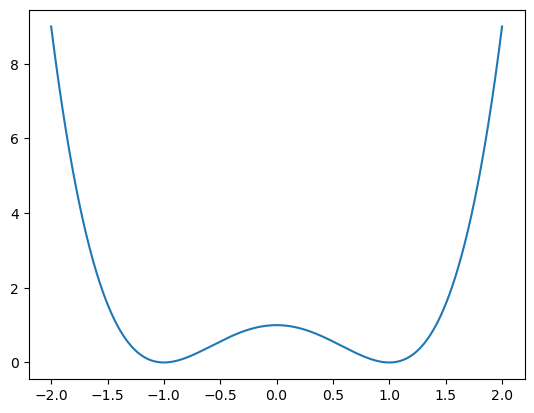

In [3]:
x = torch.linspace(-2,2,10000).reshape((-1,1))
def f(x): return 1 - 2 * x ** 2 + x ** 4
y = f(x)
plt.plot(x, y);

In [91]:
W1 = torch.randn((1, 6))
b1 = torch.randn((6))
W2 = torch.randn((5, 6))
b2 = torch.randn((6))
W3 = torch.randn((5, 1))
b3 = torch.randn((1))
pre_z1 = x @ W1 + b1    # 10000 * 6
z1 = torch.cat((pre_z1[:, 0][:, None], torch.sin(pre_z1[:, 1][:, None]), torch.cos(
    pre_z1[:, 2][:, None]), torch.sigmoid(pre_z1[:, 3][:, None]), pre_z1[:, 4][:, None] * pre_z1[:, 5][:, None]), 1)    # 10000 * 5
pre_z2 = z1 @ W2 + b2   # 10000 * 6
z2 = torch.cat((pre_z2[:, 0][:, None], torch.sin(pre_z2[:, 1][:, None]), torch.cos(
    pre_z2[:, 2][:, None]), torch.sigmoid(pre_z2[:, 3][:, None]), pre_z2[:, 4][:, None] * pre_z2[:, 5][:, None]), 1)    # 10000 * 5
y_hat = z2 @ W3 + b3    # 10000 * 1
parameters = [W1, b1, W2, b2, W3, b3]
n_parameters = sum(i.nelement() for i in parameters)
n_parameters


54

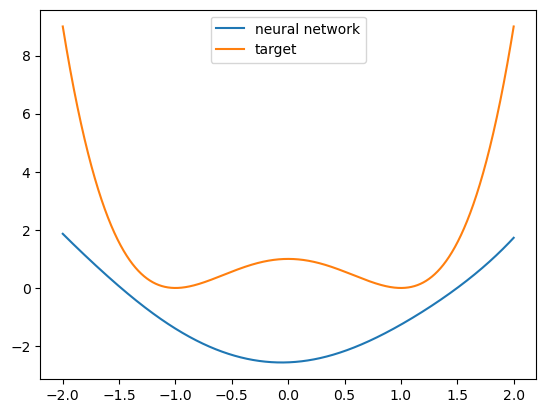

In [92]:
plt.plot(x, y_hat, label='neural network')
plt.plot(x, y, label='target')
plt.legend();

In [93]:
# regularization = 0.1
# norm = torch.zeros((1))
# for p in parameters:
#     norm += p.abs().sum()
loss = ((y_hat- y) ** 2).mean(0) # + regularization * sum([p.abs().sum() for p in parameters])
loss

for p in parameters:
    p.requires_grad = True

lossi = []

In [94]:
regularization = 0.1
    
def forward(x, parameters):
    W1, b1, W2, b2, W3, b3 = parameters
    pre_z1 = x @ W1 + b1
    z1 = torch.cat((pre_z1[:, 0][:, None], torch.sin(pre_z1[:, 1][:, None]), torch.cos(
        pre_z1[:, 2][:, None]), torch.sigmoid(pre_z1[:, 3][:, None]), pre_z1[:, 4][:, None] * pre_z1[:, 5][:, None]), 1)
    pre_z2 = z1 @ W2 + b2
    z2 = torch.cat((pre_z2[:, 0][:, None], torch.sin(pre_z2[:, 1][:, None]), torch.cos(
        pre_z2[:, 2][:, None]), torch.sigmoid(pre_z2[:, 3][:, None]), pre_z2[:, 4][:, None] * pre_z2[:, 5][:, None]), 1)
    y_hat = z2 @ W3 + b3
    return y_hat
    
learning_rate = 0.01
batch_size = 100
n = 10000

for i in range(n):
    ix = torch.randint(0,len(x), (batch_size,))
    x_batch = x[ix]
    y_batch = y[ix]


    y_hat = forward(x_batch, parameters)

    loss = ((y_hat - y_batch) ** 2).mean(0) 
    if int(0.3*n) < i < int(0.9*n):
        loss += regularization * sum([p.abs().sum() for p in parameters])

    lossi.append(loss.item())

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        with torch.no_grad():
            p += -learning_rate * p.grad
            if i > int(0.9*n):
                p[p.abs() < 0.01] = 0.0
    
print(loss.item())


0.0014523284044116735


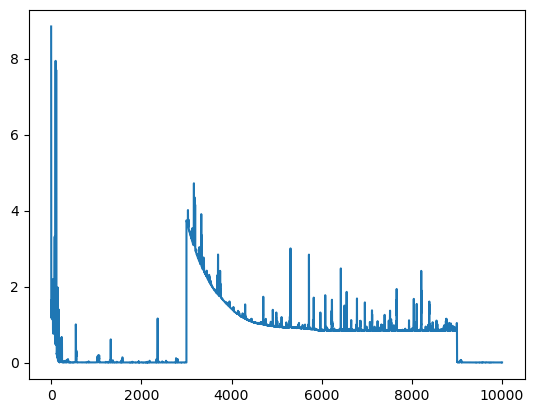

In [95]:
plt.plot(lossi)

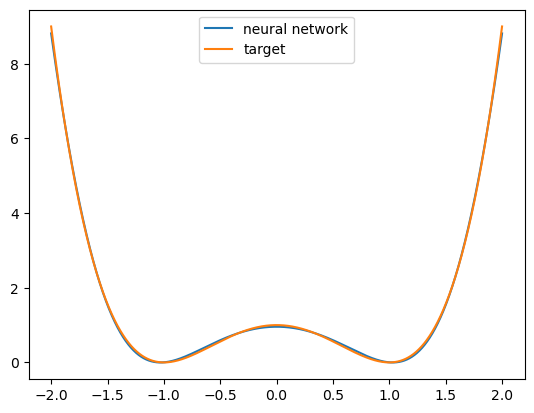

In [96]:
y_hat = forward(x, parameters)
plt.plot(x, y_hat.detach(), label='neural network')
plt.plot(x, y, label='target')
plt.legend();


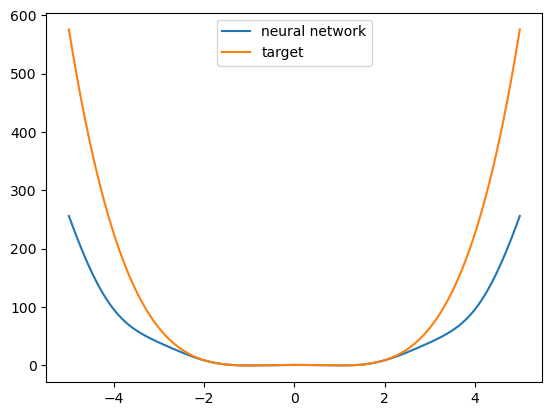

In [97]:
x2 = torch.linspace(-5,5,1000).reshape((-1, 1))
y2 = forward(x2, parameters).detach()

plt.plot(x2, y2, label='neural network')
plt.plot(x2, f(x2), label='target')
plt.legend();


In [100]:
for p in parameters:
    print(p)

tensor([[ 0.0000,  0.0000,  2.3875,  0.0000,  1.0020, -1.0021]],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0.], requires_grad=True)
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.8539],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.4522, -0.6213]],
       requires_grad=True)
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.8703, 0.0000], requires_grad=True)
tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [1.2872]], requires_grad=True)
tensor([0.], requires_grad=True)


$a = 
\begin{pmatrix}
0*x\\ 
\sin(0*x)\\ 
\cos(2.38*x)\\ 
sigm(0*x)\\ 
(1*x)*(-1*x)
\end{pmatrix} = 
\begin{pmatrix}
0\\ 
0\\ 
\cos(2.3875*x)\\ 
\frac{1}{2}\\ 
-(1.002*1.0021)*x^2
\end{pmatrix}$

$b = 
\begin{pmatrix}
0*a_1+0*a_2+0*a_3+0*a_4+0*a_5\\
\sin(0*a_1+0*a_2+0*a_3+0*a_4+0*a_5)\\
\cos(0*a_1+0*a_2+0*a_3+0*a_4+0*a_5)\\
sigm(0*a_1+0*a_2+0*a_3+0*a_4+0*a_5)\\
(0*a_1+0*a_2+0*a_3+0*a_4+-0.4522*a_5+0.8703)*(0*a_1+0*a_2+0.8539*a_3+0*a_4+-0.6213*a_5)
\end{pmatrix} = 
\begin{pmatrix}
0\\
0\\
1\\
\frac{1}{2}\\
(-0.4522*(-(1.002*1.0021)*x^2)+0.8703)*(0.8539*\cos(2.3875*x)+-0.6213*(-(1.002*1.0021)*x^2))
\end{pmatrix}$

$c =
0*b_1 + 0*b_2 + 0*b_3 + 0*b_4 + 1.2872*b_5 = 
1.2872*b_5 = 
1.2872 * (-0.4522*(-(1.002*1.0021)*x^2)+0.8703)*(0.8539*\cos(2.3875*x)+-0.6213*(-(1.002*1.0021)*x^2))$



---
---
$c = 1.2872 * (-0.4522*(-(1.002*1.0021)*x^2)+0.8703)*(0.8539*\cos(2.3875*x)+-0.6213*(-(1.002*1.0021)*x^2))$

$c = 1.2872 * ((0.4522*1.002*1.0021*x^2)+0.8703)*(0.8539*\cos(2.3875*x)+0.6213*1.002*1.0021*x^2)$

(1000, 1)


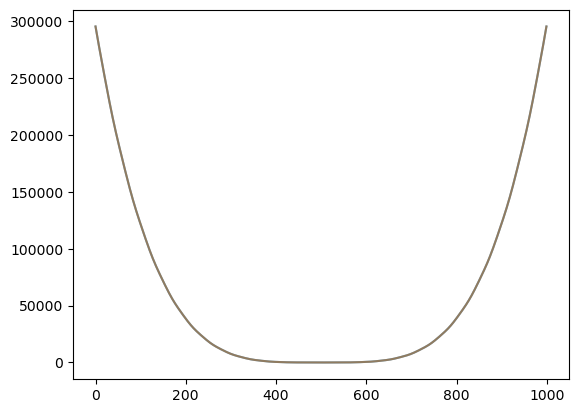

In [127]:
def c(x): return 1.2872*(-0.4522*(-(1.002*1.0021)*x**2)+0.8703)*(0.8539*torch.cos(2.3875*x)-0.6213*(-(1.002*1.0021)*x**2))
q = torch.linspace(-30,30,1000).reshape((-1,1))
p1 = forward(q, parameters).detach().numpy()
p2 = [c(i) for i in q]
print(p1.shape)
plt.plot(p1)
plt.plot(p2, alpha=.5)


In [105]:
def interpretation(parameters):
    W1, b1 ,W2, b2, W3, b3 = parameters
    functions = ['linear', 'sin', 'cos', 'sigmoid', 'multiplication']
    interp_table = dict(torch.arange(len(functions)), functions)
    print(interp_table)


    f'sin({x1})'
